In [1]:
import os
import boto
import pandas as pd
import urllib2
from urllib import urlretrieve 
import dicom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from boto.s3.key import Key

In [2]:
import sys
import cv2
from matplotlib.pyplot import savefig

In [3]:
import matplotlib.image as mpimg

In [4]:
sys.version_info

sys.version_info(major=2, minor=7, micro=11, releaselevel='final', serial=0)

In [5]:
%matplotlib inline

In [8]:
KEY = os.environ['AWSKEY']

In [9]:
SECRET = os.environ['AWSSECRET']

In [10]:
conn = boto.connect_s3(KEY, SECRET)

In [11]:
conn.get_all_buckets()

[<Bucket: capstoneerichullander>,
 <Bucket: datasciencebowl>,
 <Bucket: elasticbeanstalk-us-west-2-143473848749>,
 <Bucket: erich2015>]

In [12]:
b = conn.get_bucket('datasciencebowl')

In [13]:
keys = [x for x in b.list("train/10/study/sax_10/I")]

In [14]:
keys[0].name[-8::]

u'0001.dcm'

In [15]:
cd

/home/ubuntu


In [19]:
for i, key in enumerate(keys):
    filename =  'tmp/' + str(i) + '.dcm'
    key.get_contents_to_filename(key.name[-8::])

In [17]:
cd tmp

/home/ubuntu/tmp


In [18]:
ls

0001.dcm  0005.dcm  0009.dcm  0013.dcm  0017.dcm  0021.dcm  0025.dcm  0029.dcm
0002.dcm  0006.dcm  0010.dcm  0014.dcm  0018.dcm  0022.dcm  0026.dcm  0030.dcm
0003.dcm  0007.dcm  0011.dcm  0015.dcm  0019.dcm  0023.dcm  0027.dcm  test1.png
0004.dcm  0008.dcm  0012.dcm  0016.dcm  0020.dcm  0024.dcm  0028.dcm  test.png


In [74]:
path = '/home/ubuntu/tmp'

In [77]:
sorted(os.listdir(path))

['0.dcm',
 '1.dcm',
 '10.dcm',
 '11.dcm',
 '12.dcm',
 '13.dcm',
 '14.dcm',
 '15.dcm',
 '16.dcm',
 '17.dcm',
 '18.dcm',
 '19.dcm',
 '2.dcm',
 '20.dcm',
 '21.dcm',
 '22.dcm',
 '23.dcm',
 '24.dcm',
 '25.dcm',
 '26.dcm',
 '27.dcm',
 '28.dcm',
 '29.dcm',
 '3.dcm',
 '30.dcm',
 '4.dcm',
 '5.dcm',
 '6.dcm',
 '7.dcm',
 '8.dcm',
 '9.dcm',
 'test.png']

/home/ubuntu/tmp/0.dcm
/home/ubuntu/tmp/1.dcm
2 99.5464477539 1.dcm


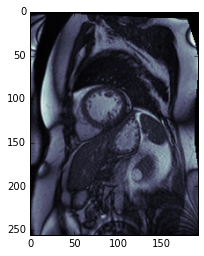

/home/ubuntu/tmp/10.dcm
3 98.6051432292 10.dcm


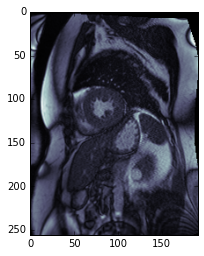

/home/ubuntu/tmp/11.dcm
4 98.2817382812 11.dcm


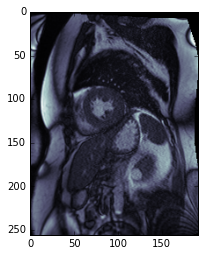

/home/ubuntu/tmp/12.dcm
5 98.2895914714 12.dcm


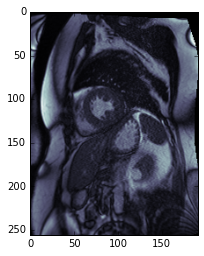

/home/ubuntu/tmp/13.dcm
6 98.424601237 13.dcm


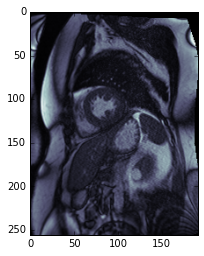

/home/ubuntu/tmp/14.dcm
7 98.5292358398 14.dcm


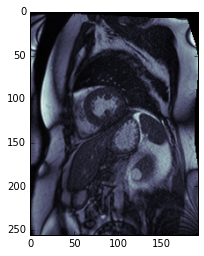

/home/ubuntu/tmp/15.dcm
8 98.7197062174 15.dcm


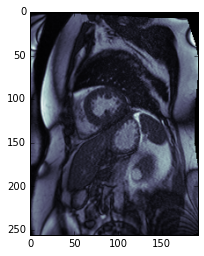

/home/ubuntu/tmp/16.dcm
9 99.1221516927 16.dcm


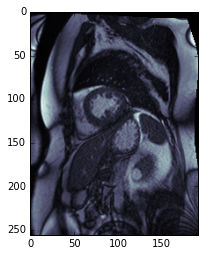

/home/ubuntu/tmp/17.dcm
10 99.6453857422 17.dcm


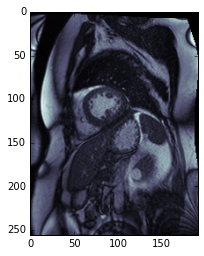

/home/ubuntu/tmp/18.dcm
11 99.9095458984 18.dcm


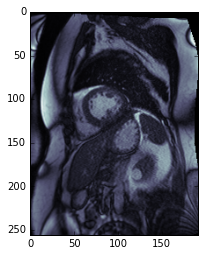

/home/ubuntu/tmp/19.dcm
12 99.6970011393 19.dcm


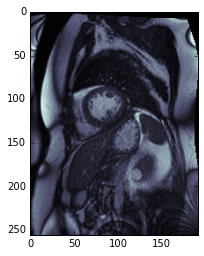

/home/ubuntu/tmp/2.dcm
13 99.4981079102 2.dcm


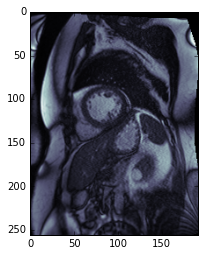

/home/ubuntu/tmp/20.dcm
14 99.480855306 20.dcm


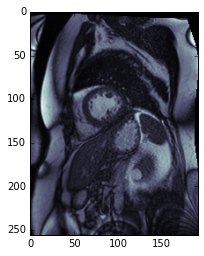

/home/ubuntu/tmp/21.dcm
15 99.2695922852 21.dcm


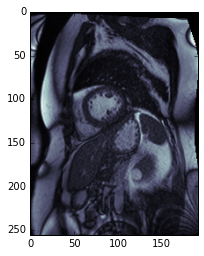

/home/ubuntu/tmp/22.dcm
16 99.2891235352 22.dcm


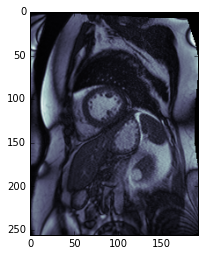

/home/ubuntu/tmp/23.dcm
17 99.3166097005 23.dcm


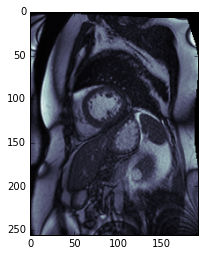

/home/ubuntu/tmp/24.dcm
18 99.2190755208 24.dcm


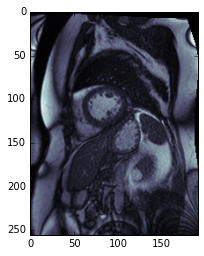

/home/ubuntu/tmp/25.dcm
19 99.148030599 25.dcm


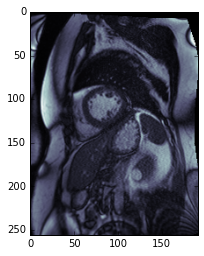

/home/ubuntu/tmp/26.dcm
20 99.1975301107 26.dcm


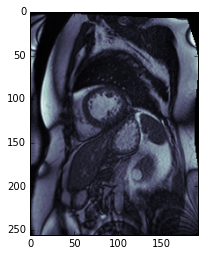

/home/ubuntu/tmp/27.dcm
21 99.3027547201 27.dcm


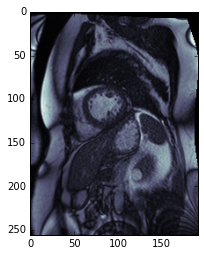

/home/ubuntu/tmp/28.dcm
22 99.5342814128 28.dcm


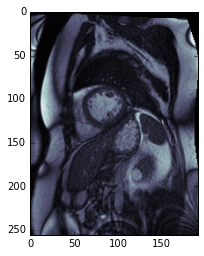

/home/ubuntu/tmp/29.dcm
23 99.957417806 29.dcm


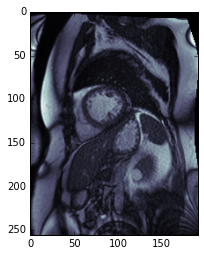

/home/ubuntu/tmp/3.dcm
24 99.3083699544 3.dcm


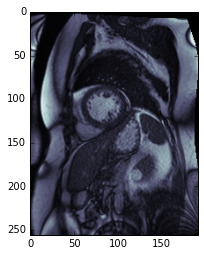

/home/ubuntu/tmp/30.dcm
25 100.089070638 30.dcm


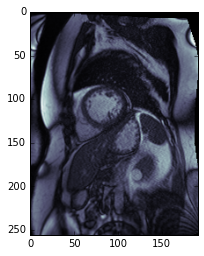

/home/ubuntu/tmp/4.dcm
26 99.2025553385 4.dcm


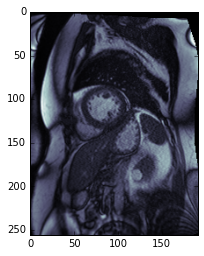

/home/ubuntu/tmp/5.dcm
27 99.187113444 5.dcm


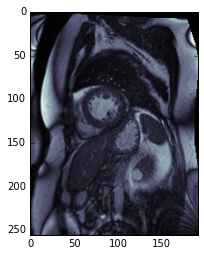

/home/ubuntu/tmp/6.dcm
28 99.2319539388 6.dcm


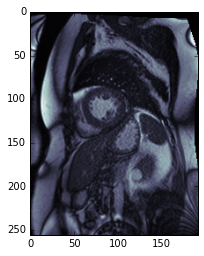

/home/ubuntu/tmp/7.dcm
29 99.0783691406 7.dcm


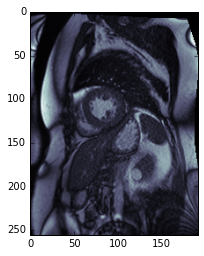

/home/ubuntu/tmp/8.dcm
30 98.9121500651 8.dcm


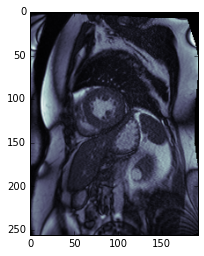

/home/ubuntu/tmp/9.dcm
31 98.8275146484 9.dcm


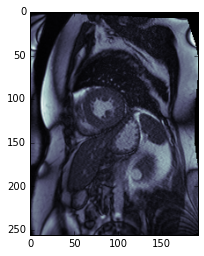

/home/ubuntu/tmp/test.png


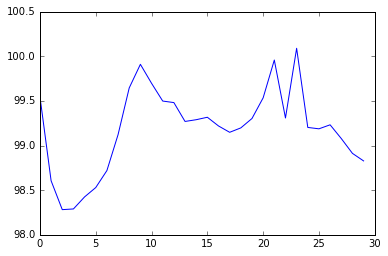

In [76]:
heart = []
files = []
i =0
for f in sorted(os.listdir(path)):
    i+=1
    filepath = path + '/' + f
    print filepath
    ds = dicom.read_file(filepath, force=True)
    #ds
    try:
        data = ds.pixel_array
        meanheart = data.mean()
        heart.append(meanheart)
        files.append(filepath)
        plt.imshow(data, cmap=plt.cm.bone)
        print i, meanheart, f
        plt.show()
    except:
        continue
    
plt.plot(heart)

In [17]:
filessorted = np.array(files)[np.argsort(heart)]

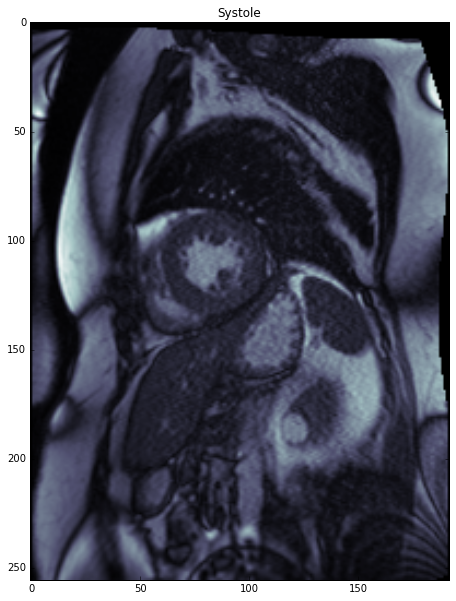

In [65]:
ds = dicom.read_file(filessorted[0])
data1 = ds.pixel_array
plt.figure(figsize=(20,10))
plt.title('Systole')
plt.imshow(data1, cmap=plt.cm.bone)

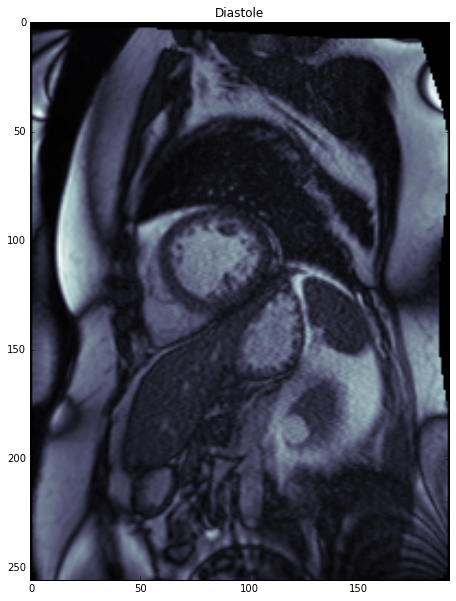

In [66]:
ds = dicom.read_file(filessorted[-1])
data2 = ds.pixel_array
plt.figure(figsize=(20,10))
plt.title('Diastole')
plt.imshow(data2, cmap=plt.cm.bone)
savefig('test.png', bbox_inches='tight')

In [44]:
D = data2.astype(int) - data1.astype(int)

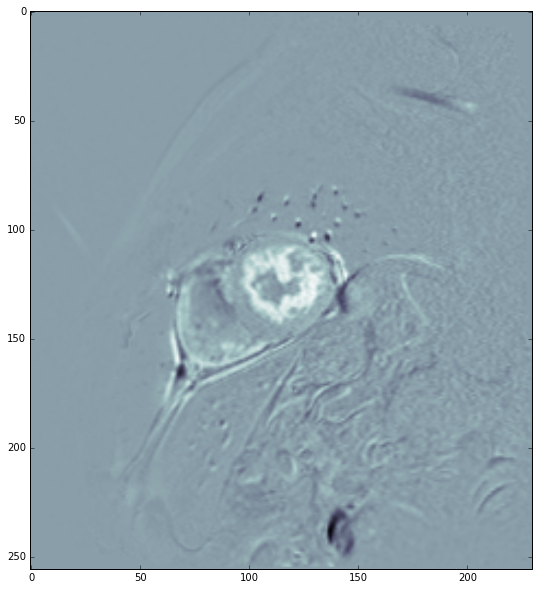

In [45]:
plt.figure(figsize=(20,10))
plt.imshow(D,cmap=plt.cm.bone)
savefig('test1.png', bbox_inches='tight')

In [46]:
img=mpimg.imread('test.png')

In [47]:
# Read image
im = cv2.imread("test.png", cv2.IMREAD_GRAYSCALE)
 

In [48]:
params = cv2.SimpleBlobDetector_Params()

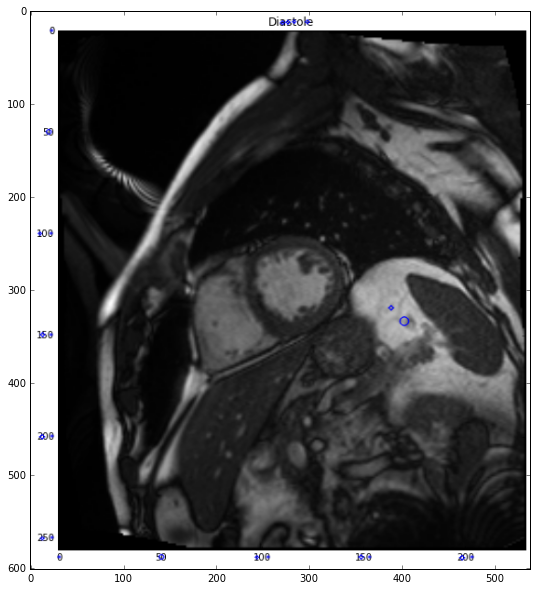

In [49]:
# Change thresholds
params.minThreshold = 150;
params.maxThreshold = 1000;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 10
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector(params)
 
# Detect blobs.
keypoints = detector.detect(im)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 

plt.figure(figsize=(20,10))
plt.imshow(im_with_keypoints)

In [ ]:
image = cv2.imread("test.png")

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# detect circles in the image
circles = cv2.HoughCircles(gray, cv2.cv.CV_HOUGH_GRADIENT, 1.2, 100)
 
# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
 
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
 
    # show the output image
    plt.imshow(np.hstack([image, output]))
    #cv2.waitKey(0)

In [ ]:
image = cv2.imread("test1.png")
plt.imshow(image)

In [ ]:
img = cv2.imread('test1.png');
#img = cv2.medianBlur(img,5)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,th1 = cv2.threshold(img,1,100,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,3)

#titles = ['Original Image', 'Global Thresholding (v = 127)',
#         'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
#images = [image, th1, th2, th3]

plt.imshow(th3)

In [ ]:
2